## Домашняя работа. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: Target feature. Binary.	Income >50K, <=50K.

In [1]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()
pd.__version__ # 1.4.1

Saving adult.csv.gz to adult.csv.gz


'2.2.2'

In [9]:
#columns = 'age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income'.split(',')
df = pd.read_csv('adult.csv.gz',na_values='?')

df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


1) Выведите последние 10 элементов датасета

In [10]:
df.iloc[-10:]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете?

In [11]:
df.info()
print("строки",len(df),"колонки",len(df.columns))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
строки 32561 колонки 15


3) Какие типы данных у элементов этого датасета?

In [12]:
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object


4) Какие признаки имеют пропуски?

In [13]:
print(df.isnull().sum())


age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: это систематическая ошибка или какая-то случайная погрешность.

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [14]:
print(df['workclass'].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [16]:
print(df.groupby('sex')['age'].mean())


sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: xlabel='education'>

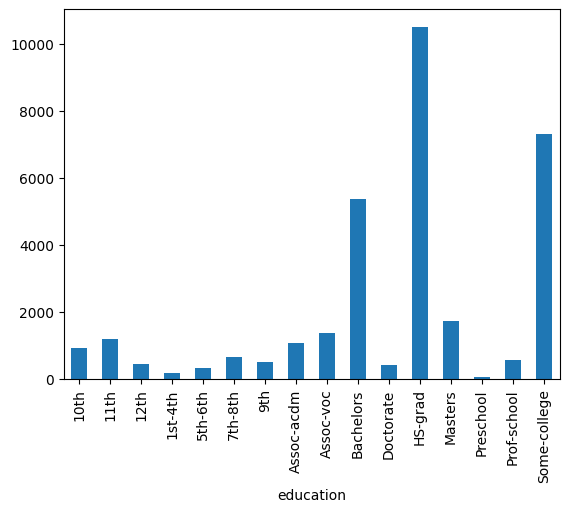

In [17]:
%matplotlib inline
df.groupby('education').count()['sex'].plot(kind='bar')


9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [18]:
print("средние значения более 50K",df[df['income'] == '>50K']['age'].mean())
print("средние значения менее 50K",df[df['income'] == '<=50K']['age'].mean())
print("среднеквадратичные отклонения более 50K",df[df['income'] == '>50K']['age'].std())
print("среднеквадратичные отклонения менее 50K",df[df['income'] == '<=50K']['age'].std())


средние значения более 50K 44.24984058155847
средние значения менее 50K 36.78373786407767
среднеквадратичные отклонения более 50K 10.519027719851769
среднеквадратичные отклонения менее 50K 14.020088490824829


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [19]:
ed_vector = ['Bachelors', 'Prof.school', 'Assoc.acdm', 'Assoc.voc', 'Masters', 'Doctorate']
if df[(df['income'] == '>50K') & (~df['education'].isin(ed_vector))].empty:
    print("правда, их",df[(df['income'] == '>50K') & (df['education'].isin(ed_vector))].shape[0])
else:
    print("ложь, их",df[(df['income'] == '>50K') & (~df['education'].isin(ed_vector))].shape[0])



ложь, их 4355


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [21]:
married_statuses = ['Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']

print(f">50k {df[(df['sex'] == 'Male') & (df['marital.status'].isin(married_statuses)) & (df['income'] == '>50K')].shape[0] / df[(df['sex'] == 'Male') & (df['marital.status'].isin(married_statuses))].shape[0]:.2%}")
print(f">50k {df[(df['sex'] == 'Male') & (~df['marital.status'].isin(married_statuses)) & (df['income'] == '>50K')].shape[0] / df[(df['sex'] == 'Male') & (~df['marital.status'].isin(married_statuses))].shape[0]:.2%}")


>50k 44.05%
>50k 8.45%


12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [22]:
print(df.groupby(['native.country', 'income'])['hours.per.week'].mean().round().unstack())

income                      <=50K  >50K
native.country                         
Cambodia                     41.0  40.0
Canada                       38.0  46.0
China                        37.0  39.0
Columbia                     39.0  50.0
Cuba                         38.0  42.0
Dominican-Republic           42.0  47.0
Ecuador                      38.0  49.0
El-Salvador                  36.0  45.0
England                      40.0  45.0
France                       41.0  51.0
Germany                      39.0  45.0
Greece                       42.0  51.0
Guatemala                    39.0  37.0
Haiti                        36.0  43.0
Holand-Netherlands           40.0   NaN
Honduras                     34.0  60.0
Hong                         39.0  45.0
Hungary                      31.0  50.0
India                        38.0  46.0
Iran                         41.0  48.0
Ireland                      41.0  48.0
Italy                        40.0  45.0
Jamaica                      38.0  41.0


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [24]:
df['passive_income'] = df['capital.gain'] - df['capital.loss']

df['category'] = np.log1p(df['passive_income'].abs()).round()
df['category'] = pd.cut(df['category'], bins=10, labels=False)

print(df.pivot_table(index='education', columns='category', values='passive_income', aggfunc='count', fill_value=0))


category         0   4    5    6    7    8   9
education                                     
10th           865   3   17   38    5    3   2
11th          1089   6   24   35   17    4   0
12th           403   3    9   10    5    3   0
1st-4th        159   0    2    6    1    0   0
5th-6th        308   0    4   16    5    0   0
7th-8th        582   0   17   39    8    0   0
9th            474   4   13   20    2    0   1
Assoc-acdm     930   0   25   63   33   15   1
Assoc-voc     1194   3   19   94   52   19   1
Bachelors     4384   6  101  376  274  173  41
Doctorate      284   1    4   59   20   33  12
HS-grad       9415  22  186  570  217   68  23
Masters       1300   3   25  170  112   94  19
Preschool       47   0    2    1    0    0   1
Prof-school    363   0   10   66   19   72  46
Some-college  6533  17  137  349  179   62  14


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [26]:
female_high_income = df[(df['sex'] == 'Female') & (df['income'] == '>50K')]
country_high_income = female_high_income['native.country'].value_counts(normalize=True) * 100

print(country_high_income.sort_values(ascending=False).round(2))

native.country
United-States         92.25
Philippines            1.03
Canada                 0.77
Germany                0.60
England                0.52
Japan                  0.43
Italy                  0.43
China                  0.43
Taiwan                 0.34
South                  0.26
France                 0.26
Cuba                   0.26
Portugal               0.17
Dominican-Republic     0.17
Iran                   0.17
India                  0.17
Puerto-Rico            0.17
Poland                 0.17
Mexico                 0.17
Yugoslavia             0.09
Scotland               0.09
Jamaica                0.09
Honduras               0.09
Thailand               0.09
Ireland                0.09
Hungary                0.09
Vietnam                0.09
Laos                   0.09
Nicaragua              0.09
El-Salvador            0.09
Hong                   0.09
Greece                 0.09
Haiti                  0.09
Name: proportion, dtype: float64


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [27]:
import numpy as np
df['magic_salary'] = df['income'].apply(lambda x: np.random.randint(0, 51) if x == '<=50K' else np.random.randint(51, 201))

print(df.groupby('education')['magic_salary'].mean().round().sort_values())


education
Preschool       24.0
1st-4th         28.0
9th             29.0
11th            30.0
7th-8th         30.0
10th            31.0
12th            31.0
5th-6th         31.0
HS-grad         41.0
Some-college    44.0
Assoc-acdm      50.0
Assoc-voc       52.0
Bachelors       66.0
Masters         80.0
Doctorate       99.0
Prof-school     99.0
Name: magic_salary, dtype: float64
